In [32]:
!pip install matplotlib numpy pandas scikit-learn dask yellowbrick

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import dask.dataframe as dd
import sklearn as skl
from sklearn.decomposition import PCA
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import learning_curve
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_validate


In [34]:
names =["Linear Regressor", "Linear Regressor (One-Hot)", "PCA", 'KNN', 'TR with Squared Error', 'TR with Friedman MSE', 'TR with Poisson']

In [35]:

R2 = []
MSE = []
MAE = []

In [ ]:
dataset = '../Datasets/Small_datasetPreprocessed.parquet'

if os.path.exists(dataset):
    df = pd.read_parquet(dataset)
    df = df.dropna() 
    print(df.head(1))
    print(df.dtypes)
else:
    print("Dataset not found")


   vendorid  passenger_count  trip_distance  ratecodeid  total_amount  \
0       2.0              1.0           0.52         1.0           5.3   

   pickup_hour  time_in_taxi  tavg  precipitation  new_snow  snow_depth  \
0            9      3.616667  71.5            0.0       0.0         0.0   

   day_type  service_zone_pulocation  service_zone_dolocation  
0         1                      3.0                      3.0  
vendorid                   float64
passenger_count            float64
trip_distance              float64
ratecodeid                 float64
total_amount               float64
pickup_hour                  int32
time_in_taxi               float64
tavg                       float64
precipitation              float64
new_snow                   float64
snow_depth                 float64
day_type                     int32
service_zone_pulocation    float64
service_zone_dolocation    float64
dtype: object


In [37]:
X = df.drop(['total_amount'], axis=1)
y = df['total_amount']

In [38]:
#LINEAR REGRESSOR MODEL
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(score)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

R2.append(score)
MSE.append(mse) 
MAE.append(mae)

# Print results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

0.8477954212773607
Mean Squared Error (MSE): 9.967499225561136
Mean Absolute Error (MAE): 1.8567798510873452


In [39]:
print(len(MSE))
print(len(MAE))
print(len(R2))

1
1
1


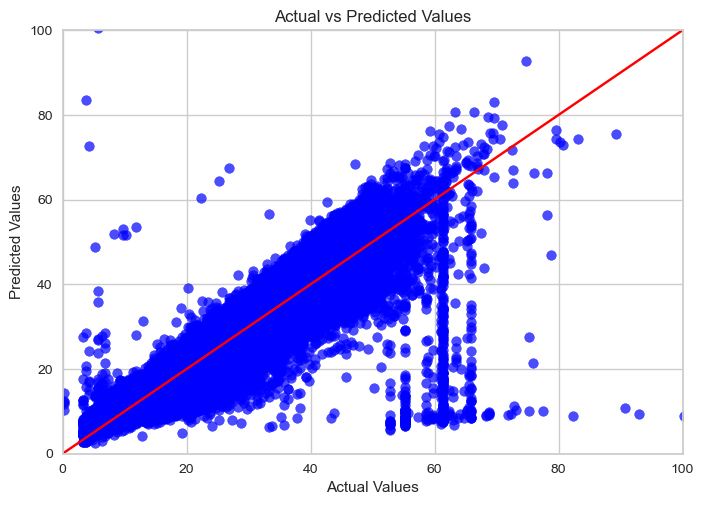

In [40]:
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), 120], [min(y_test), 120], color='red', linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlim([0, 100])  # Constrain x-axis
plt.ylim([0, 100])
plt.show()

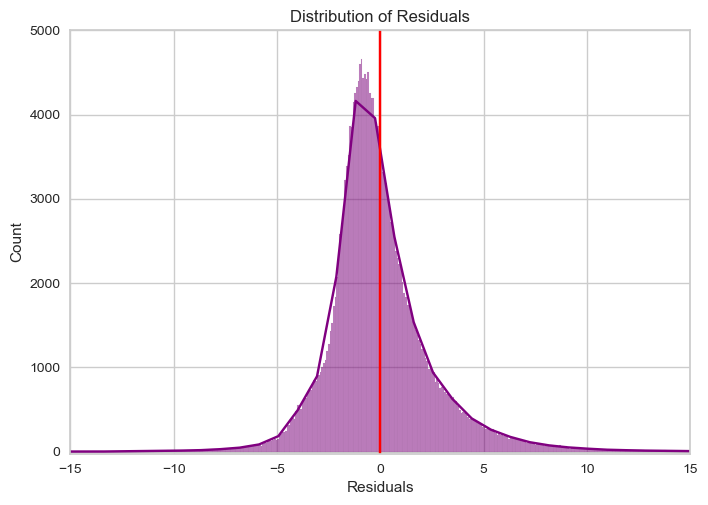

In [41]:
residuals = y_test - y_pred

sns.histplot(residuals, kde=True, color='purple')
plt.axvline(x=0, color='red', linestyle='-')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.xlim([-15, 15])  # Constrain x-axis
plt.ylim([-25, 5000])
plt.show()


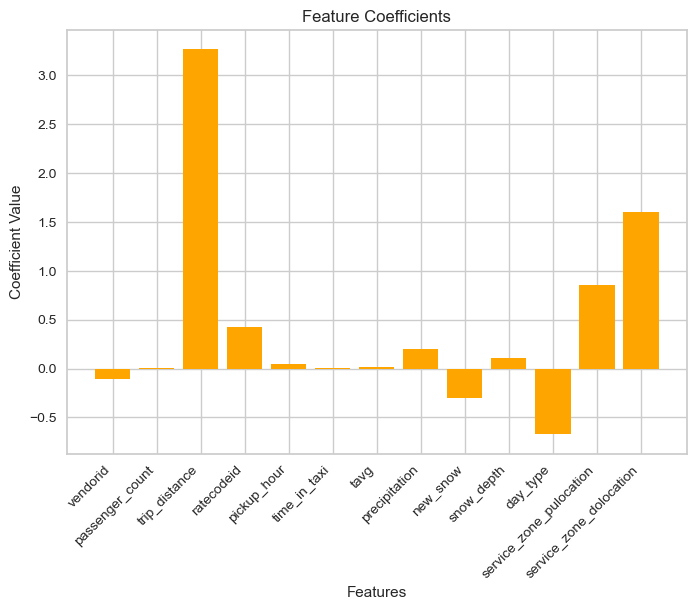

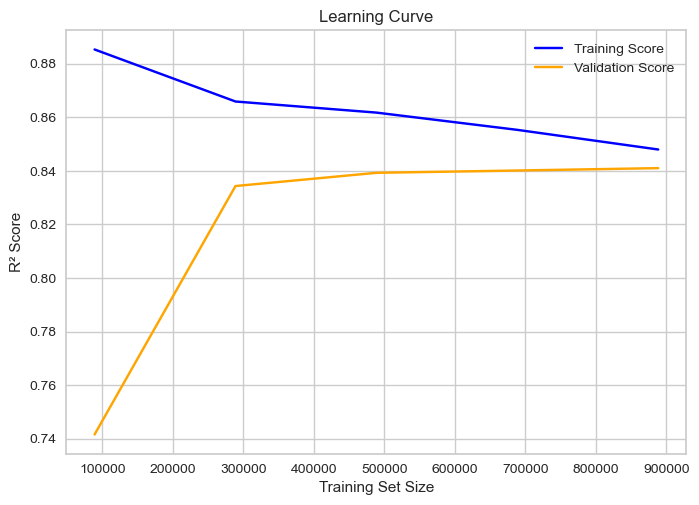

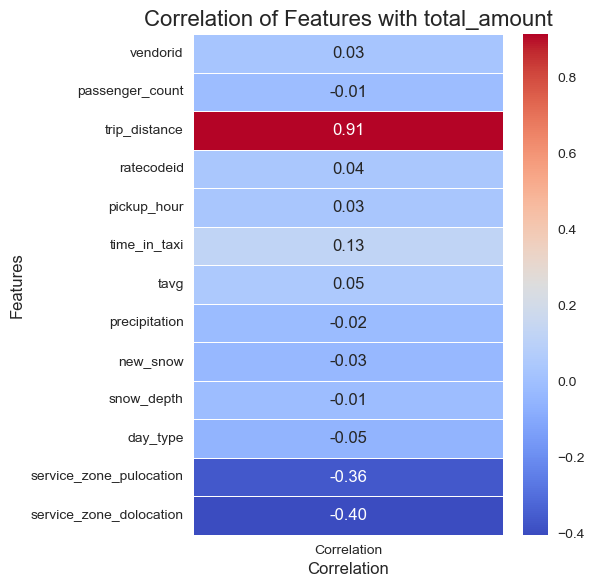

In [42]:
coef = model.coef_
features = X.columns  # Replace with the names of your features

plt.bar(features, coef, color='orange')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.show()



train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='r2', n_jobs=-1)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Score', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


correlation_matrix = df.corr()

# Extract the correlation with "fare_amount" and exclude "fare_amount" itself
fare_correlation = correlation_matrix['total_amount'].drop('total_amount')

# Convert to a DataFrame for visualization
fare_correlation_df = fare_correlation.to_frame().reset_index()
fare_correlation_df.columns = ['Feature', 'Correlation']

# Plotting the heatmap
plt.figure(figsize=(5, len(fare_correlation_df) / 2))  # Adjust figure size for clarity
sns.heatmap(fare_correlation_df.set_index('Feature'), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", linewidths=0.5)

# Adding labels and title
plt.title("Correlation of Features with total_amount", fontsize=16)
plt.xlabel("Correlation", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Show plot
plt.show()

In [43]:
X_oneHot = X
df_onehot = pd.get_dummies(df, columns=['vendorid'], prefix='vendorid')

X_train, X_test, y_train, y_test = train_test_split(X_oneHot, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

R2.append(score)
MSE.append(mse) 
MAE.append(mae)


# Print results
print("results with one-hot encoding")
print(score)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

results with one-hot encoding
0.8477954212773607
Mean Squared Error (MSE): 9.967499225561136
Mean Absolute Error (MAE): 1.8567798510873452


In [44]:
print(len(MSE))
print(len(MAE))
print(len(R2))

2
2
2


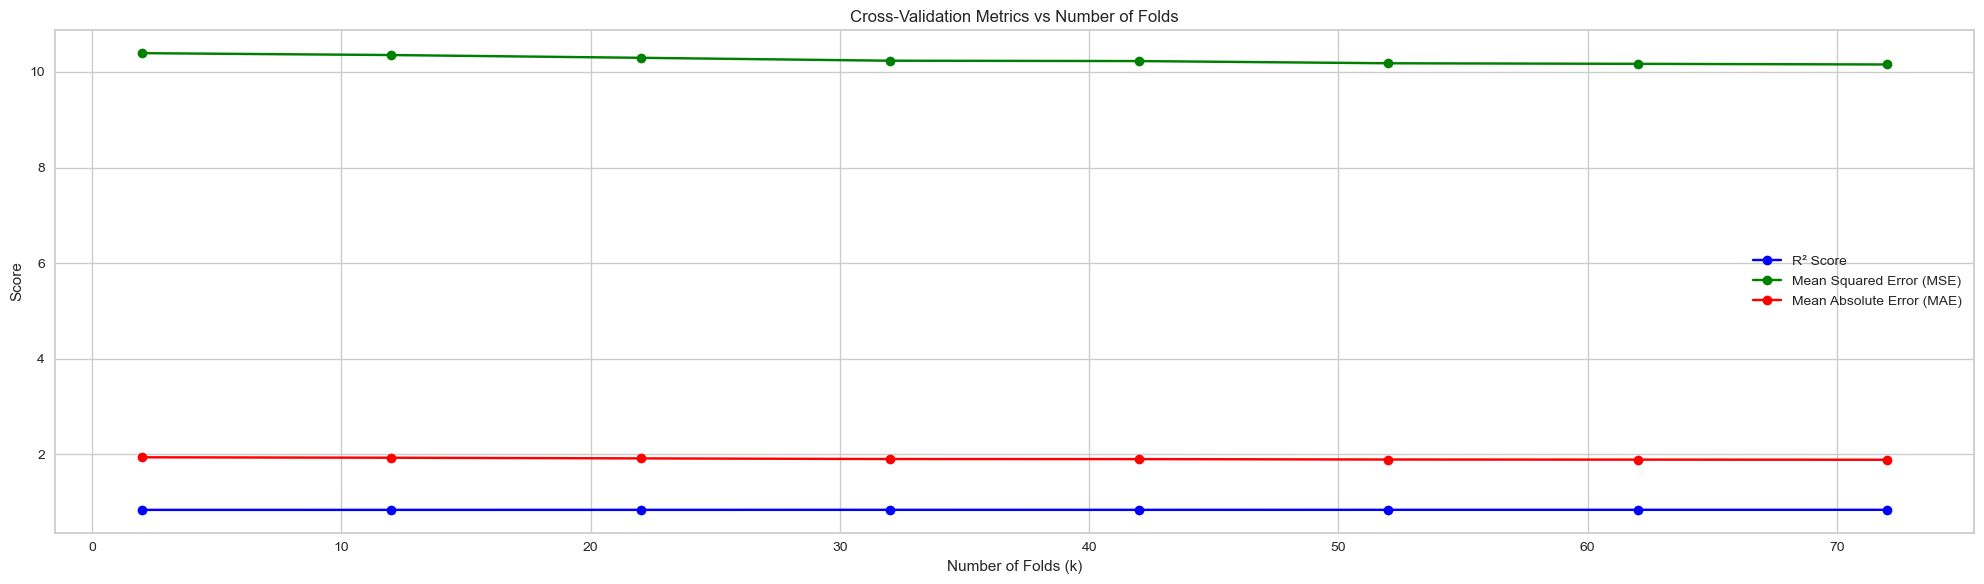

In [45]:
folds = []
mean_r2_scores = []
mean_mse_scores = []
mean_mae_scores = []

for i in range(8):
    model = LinearRegression()

    # Define custom scoring metrics for cross-validation
    scoring = {
        'R2': 'r2',  # R-squared score
        'MSE': make_scorer(mean_squared_error),  # Mean Squared Error
        'MAE': 'neg_mean_absolute_error',  # Negative Mean Absolute Error
    }

    # Perform cross-validation
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=i+2,  # Number of folds
        scoring=scoring,
        return_train_score=True
    )

    # Store results
    folds.append(10*i + 2)
    mean_r2_scores.append(cv_results['test_R2'].mean())
    mean_mse_scores.append(cv_results['test_MSE'].mean())
    mean_mae_scores.append(-cv_results['test_MAE'].mean())  # Negate MAE because it was negative

# Plot results
plt.figure(figsize=(20, 6))
plt.plot(folds, mean_r2_scores, label='R² Score', marker='o', color='blue')
plt.plot(folds, mean_mse_scores, label='Mean Squared Error (MSE)', marker='o', color='green')
plt.plot(folds, mean_mae_scores, label='Mean Absolute Error (MAE)', marker='o', color='red')

plt.xlabel('Number of Folds (k)')
plt.ylabel('Score')
plt.title('Cross-Validation Metrics vs Number of Folds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Reduced to  2 components
R² score:  0.01874573795197676
Mean Squared Error (MSE): 64.25990058331564
Mean Absolute Error (MAE): 5.506183713434837
______________________________________
Reduced to  3 components
R² score:  0.019644574056504438
Mean Squared Error (MSE): 64.20103804283903
Mean Absolute Error (MAE): 5.502929848234568
______________________________________
xxx
Reduced to  4 components
R² score:  0.8368731575184979
Mean Squared Error (MSE): 10.682771108125381
Mean Absolute Error (MAE): 1.960631713715088
______________________________________
Reduced to  5 components
R² score:  0.8368903920080848
Mean Squared Error (MSE): 10.68164246427608
Mean Absolute Error (MAE): 1.960470590759328
______________________________________
Reduced to  6 components
R² score:  0.839068548883039
Mean Squared Error (MSE): 10.539000389073996
Mean Absolute Error (MAE): 1.939721579746552
______________________________________
Reduced to  7 components
R² score:  0.8392707602489754
Mean Squared Error (MS

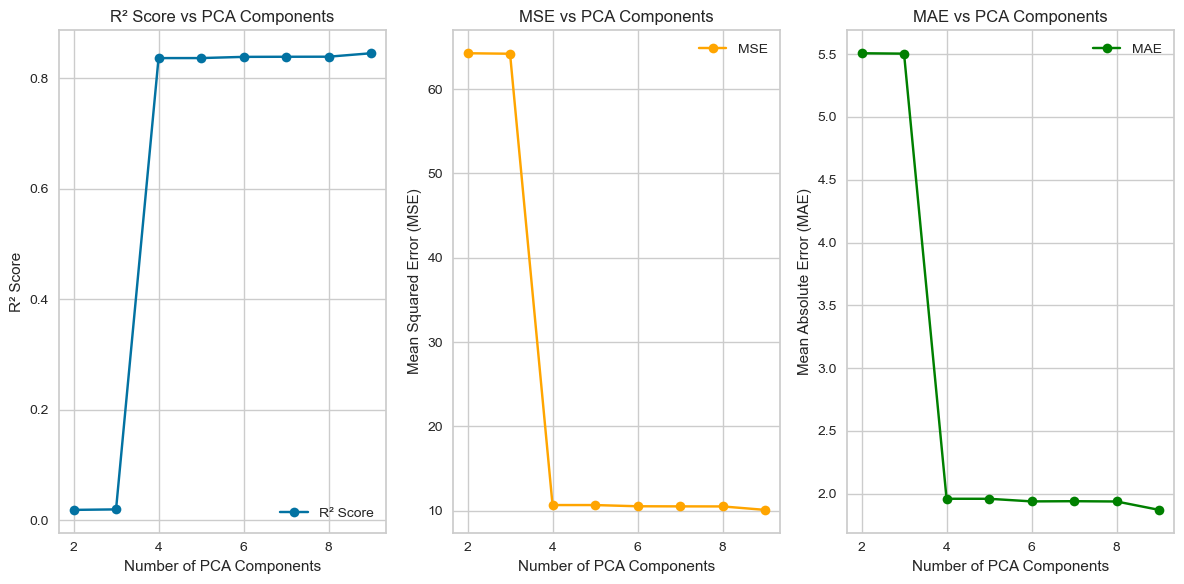

In [46]:
components = []
r2_scores = []
mse_list = []
mae_list = []

# Loop through different numbers of PCA components
for i in range(8):
    pca = PCA(n_components=i + 2)  # Incrementing the number of components
    # Fit and transform the data
    X_pca = pca.fit_transform(X)
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    second_linearRegressor = LinearRegression()
    second_linearRegressor.fit(X_train_pca, y_train)

    y_pred = second_linearRegressor.predict(X_test_pca)

    score = second_linearRegressor.score(X_test_pca, y_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    if (i+2) == 4:
        print("xxx")
        R2.append(score)
        MSE.append(mse)
        MAE.append(mae)

    # Store results for plotting
    components.append(i + 2)
    r2_scores.append(score)
    mse_list.append(mse)
    mae_list.append(mae)

    # Print results
    print("Reduced to ", i + 2, "components")
    print("R² score: ", score)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print("______________________________________")

# Plot the results
plt.figure(figsize=(12, 6))

# R² Score plot
plt.subplot(1, 3, 1)
plt.plot(components, r2_scores, marker='o', label="R² Score")
plt.xlabel("Number of PCA Components")
plt.ylabel("R² Score")
plt.title("R² Score vs PCA Components")
plt.grid(True)
plt.legend()

# MSE plot
plt.subplot(1, 3, 2)
plt.plot(components, mse_list, marker='o', label="MSE", color='orange')
plt.xlabel("Number of PCA Components")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs PCA Components")
plt.grid(True)
plt.legend()

# MAE plot
plt.subplot(1, 3, 3)
plt.plot(components, mae_list, marker='o', label="MAE", color='green')
plt.xlabel("Number of PCA Components")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("MAE vs PCA Components")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()





In [47]:
print(len(MSE))
print(len(MAE))
print(len(R2))

3
3
3


In [48]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define number of iterations and metrics lists
iterations = 5
scores = []  # R^2 scores
mses = []    # Mean Squared Errors
maes = []    # Mean Absolute Errors

n_neighbors = 7

knnModel = KNeighborsRegressor(n_neighbors=n_neighbors)
knnModel.fit(X_train, y_train)

# Make predictions
y_pred = knnModel.predict(X_test)

# Compute metrics
score = knnModel.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


R2.append(score)
MSE.append(mse)
MAE.append(mae)
'''
# Loop over different values of n_neighbors
for i in range(iterations):
    n_neighbors = 5 + 2 * i
    knnModel = KNeighborsRegressor(n_neighbors=n_neighbors)
    knnModel.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knnModel.predict(X_test)
    
    # Compute metrics
    score = knnModel.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    if i == 0:
        R2.append(score)
        MSE.append(mse)
        MAE.append(mae)

    # Store metrics
    scores.append(score)
    mses.append(mse)
    maes.append(mae)
    
    # Print results
    print(f"n_neighbors: {n_neighbors}")
    print(f"R² Score: {score}")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print("-" * 40)

# Plot the metrics
n_neighbors_values = [5 + 2 * i for i in range(iterations)]

plt.figure(figsize=(10, 6))

# Plot R^2 scores
plt.plot(n_neighbors_values, scores, label="R² Score", marker='o')

# Plot MSE
plt.plot(n_neighbors_values, mses, label="MSE", marker='o')

# Plot MAE
plt.plot(n_neighbors_values, maes, label="MAE", marker='o')

# Labels and legend
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Metrics")
plt.title("Metrics vs. Number of Neighbors in KNN")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

'''


'\n# Loop over different values of n_neighbors\nfor i in range(iterations):\n    n_neighbors = 5 + 2 * i\n    knnModel = KNeighborsRegressor(n_neighbors=n_neighbors)\n    knnModel.fit(X_train, y_train)\n    \n    # Make predictions\n    y_pred = knnModel.predict(X_test)\n    \n    # Compute metrics\n    score = knnModel.score(X_test, y_test)\n    mse = mean_squared_error(y_test, y_pred)\n    mae = mean_absolute_error(y_test, y_pred)\n    \n    if i == 0:\n        R2.append(score)\n        MSE.append(mse)\n        MAE.append(mae)\n\n    # Store metrics\n    scores.append(score)\n    mses.append(mse)\n    maes.append(mae)\n    \n    # Print results\n    print(f"n_neighbors: {n_neighbors}")\n    print(f"R² Score: {score}")\n    print(f"MSE: {mse}")\n    print(f"MAE: {mae}")\n    print("-" * 40)\n\n# Plot the metrics\nn_neighbors_values = [5 + 2 * i for i in range(iterations)]\n\nplt.figure(figsize=(10, 6))\n\n# Plot R^2 scores\nplt.plot(n_neighbors_values, scores, label="R² Score", marker

In [49]:
print(len(MSE))
print(len(MAE))
print(len(R2))

4
4
4


Alpha: 0.5, L1 Ratio: 0.1
Score: 0.752572499493817, MSE: 16.203411489821846, MAE: 2.6695787041101333
Alpha: 0.5, L1 Ratio: 0.30000000000000004
Score: 0.7730177859950528, MSE: 14.864500538011361, MAE: 2.5259114739997512
Alpha: 0.5, L1 Ratio: 0.5000000000000001
Score: 0.7939568102932844, MSE: 13.49325592613304, MAE: 2.3664402199981716
Alpha: 0.5, L1 Ratio: 0.7000000000000001
Score: 0.812601782597261, MSE: 12.272243072510829, MAE: 2.2172644135712503
Alpha: 0.5, L1 Ratio: 0.9000000000000001
Score: 0.8271954616092625, MSE: 11.316539338293428, MAE: 2.091260583437327
Alpha: 0.6, L1 Ratio: 0.1
Score: 0.7308658617739068, MSE: 17.624925195115917, MAE: 2.8129026496807485
Alpha: 0.6, L1 Ratio: 0.30000000000000004
Score: 0.7537115121428649, MSE: 16.128820384924946, MAE: 2.6616170670394736
Alpha: 0.6, L1 Ratio: 0.5000000000000001
Score: 0.7783113423819313, MSE: 14.517838698863759, MAE: 2.48558663402165
Alpha: 0.6, L1 Ratio: 0.7000000000000001
Score: 0.8029742261658325, MSE: 12.90272779300785, MAE: 2

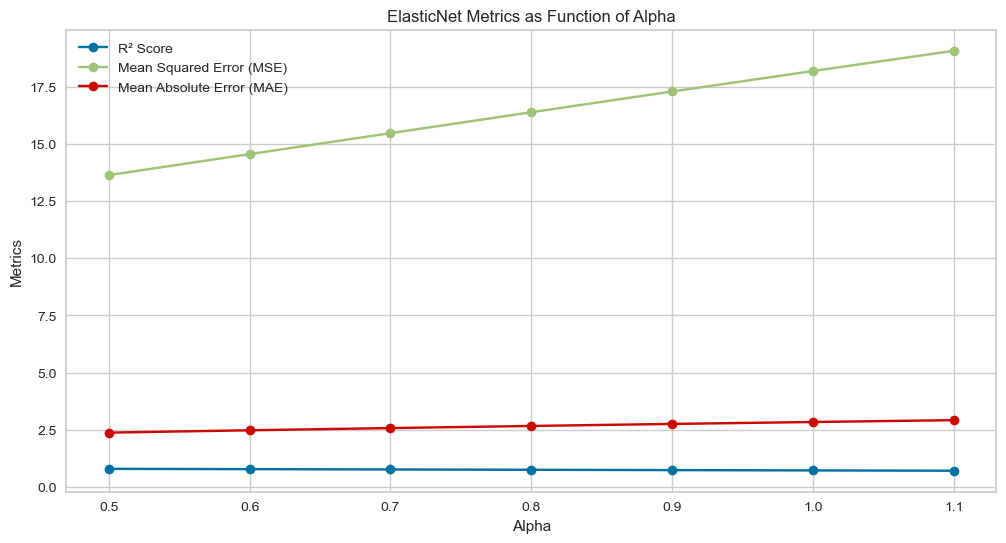

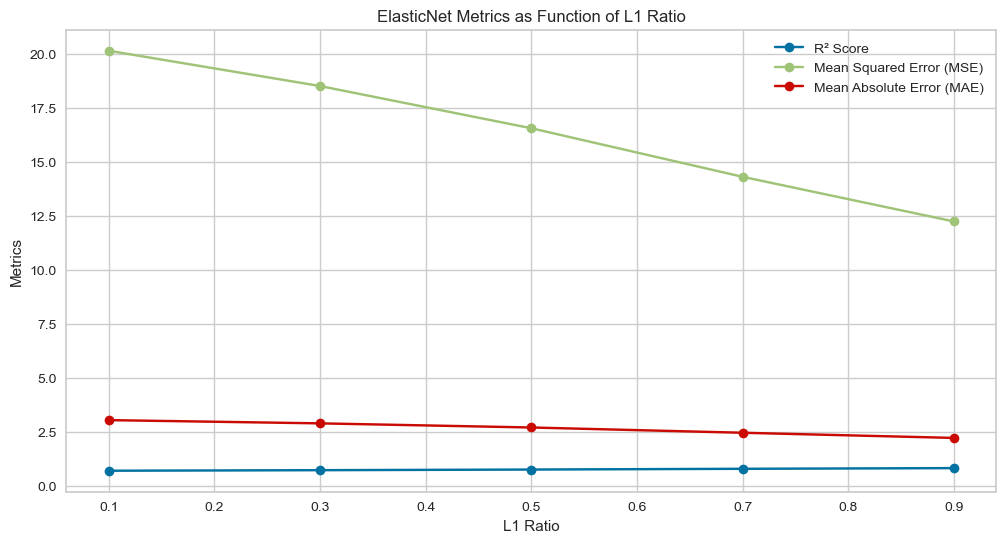

In [50]:
# Data Preparation
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)

# Hyperparameter Ranges
alpha_values = np.arange(0.5, 1.1, 0.1)  # 0.5 to 1.0, step of 0.1
l1_ratio_values = np.arange(0.1, 1.1, 0.2)  # 0.1 to 1.0, step of 0.2

# Initialize lists to store results
scores = []
mse_list = []
mae_list = []

# Loop over hyperparameters
for alpha in alpha_values:
    for l1_ratio in l1_ratio_values:
        print(f"Alpha: {alpha}, L1 Ratio: {l1_ratio}")
        eNet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42, max_iter=5000, tol=1e-3)
        eNet.fit(X_train1_scaled, y_train1)
        
        # Predict
        y_pred = eNet.predict(X_test1_scaled)
        
        # Compute metrics
        score = eNet.score(X_test1_scaled, y_test1)
        mse = mean_squared_error(y_test1, y_pred)
        mae = mean_absolute_error(y_test1, y_pred)
        
        # Append results
        scores.append(score)
        mse_list.append(mse)
        mae_list.append(mae)
        
        print(f"Score: {score}, MSE: {mse}, MAE: {mae}")

# Reshape the results for easier plotting
scores_array = np.array(scores).reshape(len(alpha_values), len(l1_ratio_values))
mse_array = np.array(mse_list).reshape(len(alpha_values), len(l1_ratio_values))
mae_array = np.array(mae_list).reshape(len(alpha_values), len(l1_ratio_values))

# Plot Results for Alpha
plt.figure(figsize=(12, 6))
plt.plot(alpha_values, scores_array.mean(axis=1), label="R² Score", marker='o')
plt.plot(alpha_values, mse_array.mean(axis=1), label="Mean Squared Error (MSE)", marker='o')
plt.plot(alpha_values, mae_array.mean(axis=1), label="Mean Absolute Error (MAE)", marker='o')

plt.xlabel("Alpha")
plt.ylabel("Metrics")
plt.title("ElasticNet Metrics as Function of Alpha")
plt.legend()
plt.grid(True)
plt.show()

# Plot Results for L1 Ratio
plt.figure(figsize=(12, 6))
plt.plot(l1_ratio_values, scores_array.mean(axis=0), label="R² Score", marker='o')
plt.plot(l1_ratio_values, mse_array.mean(axis=0), label="Mean Squared Error (MSE)", marker='o')
plt.plot(l1_ratio_values, mae_array.mean(axis=0), label="Mean Absolute Error (MAE)", marker='o')

plt.xlabel("L1 Ratio")
plt.ylabel("Metrics")
plt.title("ElasticNet Metrics as Function of L1 Ratio")
plt.legend()
plt.grid(True)
plt.show()


In [51]:
# Define the criteria to test
criteria = ['squared_error', 'friedman_mse', 'poisson']

# Split the dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over criteria
for criterion in criteria:
    # Initialize and train the DecisionTreeRegressor
    treeRegressor = DecisionTreeRegressor(
        criterion=criterion,
        splitter='best',
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        random_state=42,
    )
    treeRegressor.fit(X_train1, y_train1)
    
    # Make predictions
    y_pred = treeRegressor.predict(X_test1)
    
    # Compute metrics
    score = treeRegressor.score(X_test1, y_test1)
    mse = mean_squared_error(y_test1, y_pred)
    mae = mean_absolute_error(y_test1, y_pred)

    R2.append(score)
    MSE.append(mse)
    MAE.append(mae)
    
    # Print results
    print(f"Criterion: {criterion}")
    print(f"R² Score: {score}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print("-" * 40)


Criterion: squared_error
R² Score: 0.9598331401264547
Mean Squared Error (MSE): 2.6304277311680835
Mean Absolute Error (MAE): 0.6955158973066403
----------------------------------------
Criterion: friedman_mse
R² Score: 0.9596390931419191
Mean Squared Error (MSE): 2.6431353854601762
Mean Absolute Error (MAE): 0.6962893381823424
----------------------------------------
Criterion: poisson
R² Score: 0.960572368304519
Mean Squared Error (MSE): 2.5820175167434827
Mean Absolute Error (MAE): 0.6967248487685447
----------------------------------------


In [52]:
print("Length of names:", len(names))
print("Length of MSE:", len(MSE))
print("Length of R2:", len(R2))
print("Length of MAE:", len(MAE))

print("MSE:", MSE)
print("R2:", R2)
print("MAE:", MAE)



Length of names: 7
Length of MSE: 7
Length of R2: 7
Length of MAE: 7
MSE: [9.967499225561136, 9.967499225561136, 10.682771108125381, 4.623772144798974, 2.6304277311680835, 2.6431353854601762, 2.5820175167434827]
R2: [0.8477954212773607, 0.8477954212773607, 0.8368731575184979, 0.929394597834144, 0.9598331401264547, 0.9596390931419191, 0.960572368304519]
MAE: [1.8567798510873452, 1.8567798510873452, 1.960631713715088, 0.8167364033147468, 0.6955158973066403, 0.6962893381823424, 0.6967248487685447]


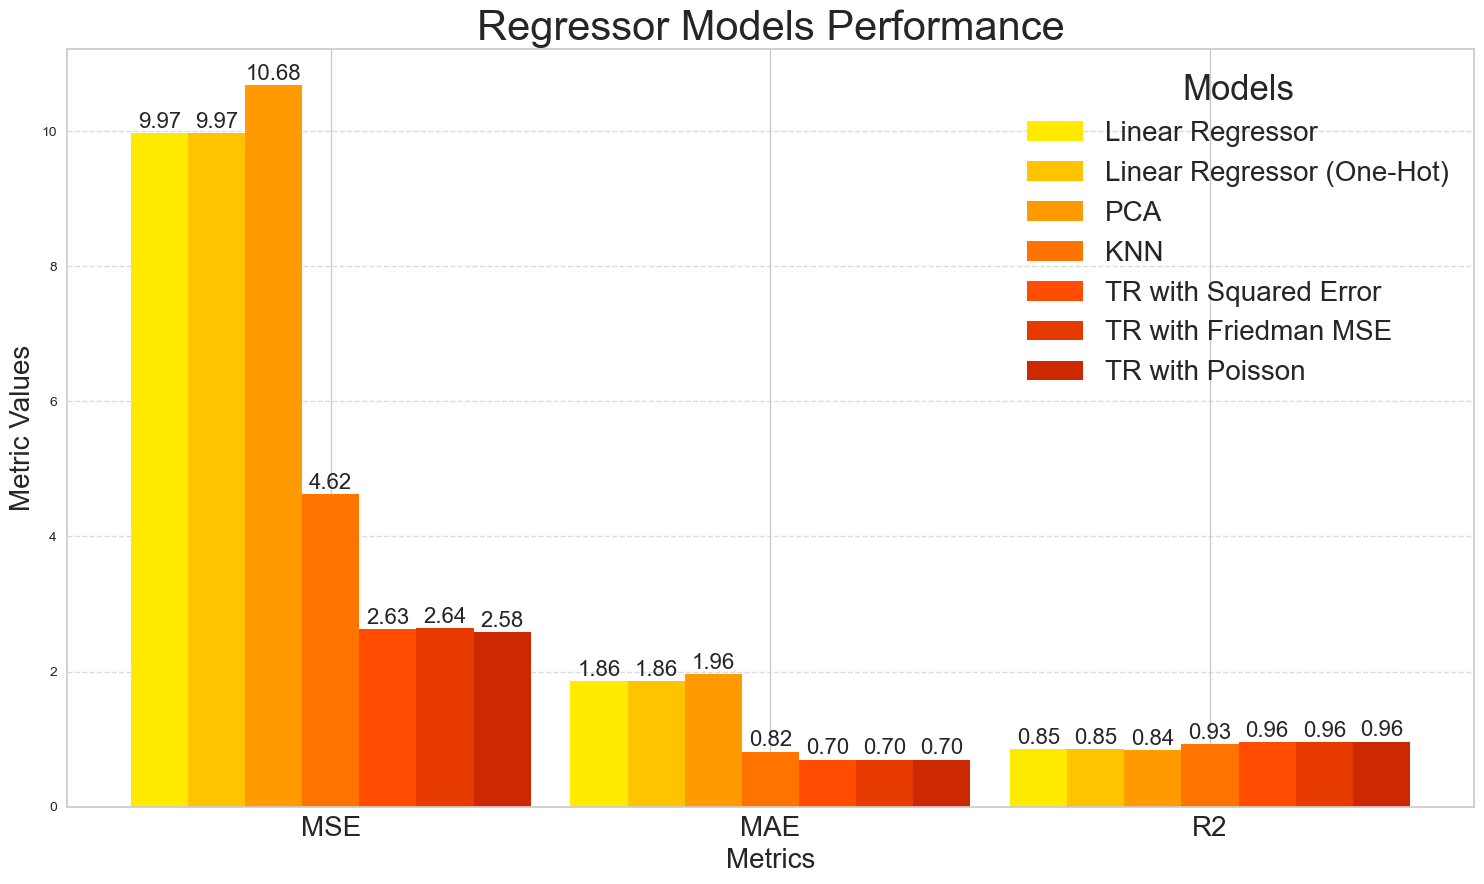

In [87]:
def plot_model_comparison(models, metrics):
    colors = ['#FFEA00', '#FFC300', '#FF9A00', '#FF7300', '#FF4C00', '#E63900', '#CC2900']
    # Bar chart parameters
    metric_labels = ["MSE", "MAE", "R2"]
    x = np.arange(len(metric_labels))  # the label locations
    width = 0.13  # width of each bar

    # Create the plot
    _, ax = plt.subplots(figsize=(15, 9))

    # Add bars for each model
    for i, model in enumerate(models):
        metric_values = [metrics[0][i], metrics[1][i], metrics[2][i]]
        bars = ax.bar(x + i * width, metric_values, width, label=model, color=colors[i])
        
        # Add value labels on top of each bar
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.2f}", ha="center", va="bottom", fontsize=16)

    # Add labels, title, and legend
    ax.set_xlabel('Metrics', fontsize=20)
    ax.set_ylabel('Metric Values', fontsize=20)
    ax.set_title('Regressor Models Performance', fontsize=30)
    ax.set_xticks(x + (width * (len(models) - 1) / 2))  # Center x-ticks under groups
    ax.set_xticklabels(metric_labels, fontsize=20)
    ax.legend(title="Models", fontsize=20, title_fontsize=25)

    # Add horizontal grid lines
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)

    # Display the plot
    plt.tight_layout()
    plt.show()

mse_array = np.array(MSE)
mae_array = np.array(MAE)
r2_array = np.array(R2)

metrics = [mse_array, mae_array, r2_array]
plot_model_comparison(names, metrics)

